# Business Understanding

## Problem Statement
Each year, students applying for tertiary education through KUCCPS (Kenya Universities and Colleges Central Placement Service) face challenges in identifying suitable course clusters. These challenges often arise due to the dynamic nature of cluster point requirements, varied student performance, and changes in institutional offerings. Students frequently lack the tools or insights to make data-driven decisions about which courses they are likely to qualify for, resulting in suboptimal course applications or outright rejections

## Objectives
The main objective of this project is to: 
1. Build a predictive model that predicts the most probable course cluster cutoff based  historical trends.

2. Recommends suitable courses aligned with the predicted cluster and student's performance.

3. Improves decision-making for applicants by providing personalized, data-driven course suggestions.
 

# Data Understanding

### Data Collection

The data for this project were sourced by scraping the KUCCPS (Kenya Universities and Colleges Central Placement Service) website. The datasets used include:

1. [**University Courses**](https://statics.kuccps.net/uploads/globalFiles/DEGREE_CUTOFFS_14-07-2025.pdf):  
   This dataset contains detailed information about university courses offered through KUCCPS. The data is stored in a SQL file.

2. [**Programme Minimum Requirements**](https://statics.kuccps.net/uploads/globalFiles/DEGREE_CLUSTER_DOCUMENT_2025_03.pdf):  
   This dataset outlines the minimum academic requirements needed for each programme, helping students understand eligibility criteria for university courses.
 

These datasets provide a comprehensive view of the available academic programmes, their entry requirements, and the institutions offering them, forming the basis for further analysis and insights.


## Loading Libraries

In [1]:
import pandas as pd  # data manipulation
import numpy as np  # numerical operations
import re  #  regular expressions (text processing)
import seaborn as sns  #  data visualization
import matplotlib.pyplot as plt  #plotting graphs

# machine learning tools
from sklearn.compose import ColumnTransformer  # apply transformations to specific columns
from sklearn.pipeline import Pipeline  # build ML pipelines
from sklearn.ensemble import RandomForestRegressor  # Random Forest regression model
from sklearn.neural_network import MLPRegressor  # Neural network regressor 
from xgboost import XGBRegressor  # Extreme Gradient Boosting regressor

# model training and evaluation
from sklearn.model_selection import train_test_split  # split data into train/test sets
from sklearn.metrics import r2_score, mean_squared_error  #  model evaluation metrics


C:\Users\Mich\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Loading dataset**

In [2]:
cutoff_df = pd.read_excel("degree_cutoffs.xlsx")

In [3]:
cutoff_df.head(5)

,programme_code,institution,programme_name,cutoff_2018,cutoff_2019,cutoff_2020,cutoff_2021,cutoff_2022,cutoff_2023,cutoff_2024
0,1105101,CHUKA UNIVERSITY,BACHELOR OF ARTS,25.798,26.729,28.419,25.974,28.566,23.714,24.851
1,1087101,KISII UNIVERSITY,BACHELOR OF ARTS,23.93,24.763,27.318,22.926,26.315,24.286,22.173
2,1073101,RONGO UNIVERSITY,BACHELOR OF ARTS,-,-,-,-,27.808,24.574,24.252
3,1057101,EGERTON UNIVERSITY,BACHELOR OF ARTS,24.851,26.54,28.227,22.926,26.783,24.188,21.799
4,1164101,MULTIMEDIA UNIVERSITY OF KENYA,"BACHELOR OF ARTS (PSYCHOLOGY, SOCIOLOGY & POLI...",-,-,-,24.456,26.207,22.449,22.851


In [4]:
cutoff_df.tail(5)

,programme_code,institution,programme_name,cutoff_2018,cutoff_2019,cutoff_2020,cutoff_2021,cutoff_2022,cutoff_2023,cutoff_2024
2045,1112470,TECHNICAL UNIVERSITY OF KENYA,BACHELOR OF TECHNOLOGY (INSTITUTIONAL MANAGEMENT),25.52,26.712,23.629,26.342,27.94,23.301,26.419
2046,1117630,PWANI UNIVERSITY,BACHELOR OF ARTS IN ISLAMIC STUDIES,25.639,26.818,20.991,19.956,19.67,20.93,-
2047,1515692,TOM MBOYA UNIVERSITY,BACHELOR OF SCIENCE (GEOGRAPHY AND NATURAL RES...,24.93,24.952,16.791,19.921,22.457,18.144,-
2048,1229692,MASENO UNIVERSITY,BACHELOR OF SCIENCE (GEOGRAPHY AND NATURAL RES...,30.588,25.562,16.791,26.022,26.024,18.144,22.596
2049,1253260,MOI UNIVERSITY,BACHELOR OF SCIENCE IN COMMUNITY HEALTH EDUCATION,26.541,29,29.471,17.459,25.577,24.852,-


In [5]:
cutoff_df.programme_name.unique()

array(['BACHELOR OF ARTS',
       'BACHELOR OF ARTS (PSYCHOLOGY, SOCIOLOGY & POLITICAL SCIENCE)',
       'BACHELOR OF ARTS (WITH IT)',
       'BACHELOR OF ARCHITECTURAL STUDIES/BACHELOR OF ARCHITECTURE',
       'BACHELOR OF ARCHITECTURE', 'BACHELOR OF QUANTITY SURVEYING',
       'BACHELOR OF ACTUARIAL SCIENCE',
       'BACHELOR OF SCIENCE (ACTUARIAL SCIENCE WITH IT)',
       'BACHELOR OF SCIENCE (ACTUARIAL SCIENCE)',
       'BACHELOR OF SCIENCE IN ACTUARIAL SCIENCE',
       'BACHELOR OF SCIENCE (ACTUARIAL SCIENCE, WITH IT)',
       'BACHELOR OF SCIENCE (INDUSTRIAL CHEMISTRY)',
       'BACHELOR OF SCIENCE IN INDUSTRIAL CHEMISTRY',
       'BACHELOR OF SCIENCE (INDUSTRIAL CHEMISTRY, WITH IT)',
       'BACHELOR OF SCIENCE (MATHEMATICS)',
       'BACHELOR OF SCIENCE IN MATHEMATICS',
       'BACHELOR OF SCIENCE (MATHEMATICAL SCIENCES, WITH IT)',
       'BACHELOR OF SCIENCE (BIOLOGY)', 'BACHELOR OF SCIENCE IN BIOLOGY',
       'BACHELOR OF SCIENCE IN BIOLOGY ( BOTANY OR ZOOLOGY OPTION)',
     

In [6]:
cutoff_df.institution.unique()

array(['CHUKA UNIVERSITY', 'KISII UNIVERSITY', 'RONGO UNIVERSITY',
       'EGERTON UNIVERSITY', 'MULTIMEDIA UNIVERSITY OF KENYA',
       'KABARNET UNIVERSITY COLLEGE',
       'KOITALEEL SAMOEI UNIVERSITY COLLEGE', 'BOMET UNIVERSITY COLLEGE',
       'THARAKA UNIVERSITY', 'UNIVERSITY OF NAIROBI', 'MOI UNIVERSITY',
       'MACHAKOS UNIVERSITY', 'SOUTH EASTERN KENYA UNIVERSITY',
       'PWANI UNIVERSITY', 'KENYATTA UNIVERSITY', 'TOM MBOYA UNIVERSITY',
       'MASENO UNIVERSITY', 'TECHNICAL UNIVERSITY OF MOMBASA',
       'JOMO KENYATTA UNIVERSITY OF AGRICULTURE AND TECHNOLOGY',
       'TECHNICAL UNIVERSITY OF KENYA', 'KCA UNIVERSITY',
       'JARAMOGI OGINGA ODINGA UNIVERSITY OF SCIENCE AND TECHNOLOGY',
       'GARISSA UNIVERSITY', 'UNIVERSITY OF EMBU',
       'CO-OPERATIVE UNIVERSITY OF KENYA', 'KIRINYAGA UNIVERSITY',
       'KABARAK UNIVERSITY', 'MERU UNIVERSITY OF SCIENCE AND TECHNOLOGY',
       'UNIVERSITY OF KABIANGA', 'CATHOLIC UNIVERSITY OF EASTERN AFRICA',
       'ZETECH UNIVERSITY'

In [7]:
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   programme_code  2050 non-null   int64 
 1   institution     2050 non-null   object
 2   programme_name  2046 non-null   object
 3   cutoff_2018     2050 non-null   object
 4   cutoff_2019     2050 non-null   object
 5   cutoff_2020     2050 non-null   object
 6   cutoff_2021     2050 non-null   object
 7   cutoff_2022     2050 non-null   object
 8   cutoff_2023     2050 non-null   object
 9   cutoff_2024     2050 non-null   object
dtypes: int64(1), object(9)
memory usage: 160.3+ KB


In [8]:
cutoff_df.describe()

,programme_code
count,2.050000e+03
mean,1.265723e+06
std,4.995338e+05
min,1.053107e+06
25%,1.093111e+06
50%,1.165143e+06
75%,1.249486e+06
max,5.535327e+06


**Degree Requirements**

In [9]:
degree_req_df = pd.read_excel("degree_requirements_from_text.xlsx")

In [10]:
degree_req_df.head()

,Unnamed: 0,programme_name,cluster,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade
0,0,Bachelor of Laws (LL.B.),1,1A,ENG/KIS,B,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null
1,1,Bachelor in Business Administration,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
2,2,Bachelor of Library & Information Science,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
3,3,"Bachelor in Business Administration, With IT",2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
4,4,Bachelor of Library and Information Studies,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null


In [11]:
degree_req_df.sample(5)

,Unnamed: 0,programme_name,cluster,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade
700,728,Bachelor of Arts (With Education),19,19B,ENG,C+,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,2nd_GROUP_II,Null,KIS / 3rd_GROUP_II / 2nd_GROUP_III / any_GROUP...,Null
636,652,Bachelor of Science (Forestry),15,15G,GEO,C,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,Null,Any_GROUP_II,Null,2nd_GROUP_II / 2nd_GROUP_III / any_GROUP_IV,Null
24,24,Bachelor of Technology (Office Administration ...,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
294,295,Bachelor of Science in Renewable Energy and Te...,5,5E,MAT_ALTERNATIVE_A,C+,PHY,C+,CHE,C+,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
528,544,Bachelor of Science (Population Health),13,13C,BIO,C,CHE,C,MAT_ALTERNATIVE_A/PHY,C,ENG/KIS / 3rd_GROUP_II / any_GROUP_III / any_G...,Null


In [12]:
degree_req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       741 non-null    int64 
 1   programme_name   741 non-null    object
 2   cluster          741 non-null    int64 
 3   subcluster       741 non-null    object
 4   subject_1        741 non-null    object
 5   subject_1_grade  741 non-null    object
 6   subject_2        741 non-null    object
 7   subject_2_grade  741 non-null    object
 8   subject_3        741 non-null    object
 9   subject_3_grade  741 non-null    object
 10  subject_4        741 non-null    object
 11  subject_4_grade  741 non-null    object
dtypes: int64(2), object(10)
memory usage: 69.6+ KB


# Data Cleaning

## Correct Formats

In [13]:
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   programme_code  2050 non-null   int64 
 1   institution     2050 non-null   object
 2   programme_name  2046 non-null   object
 3   cutoff_2018     2050 non-null   object
 4   cutoff_2019     2050 non-null   object
 5   cutoff_2020     2050 non-null   object
 6   cutoff_2021     2050 non-null   object
 7   cutoff_2022     2050 non-null   object
 8   cutoff_2023     2050 non-null   object
 9   cutoff_2024     2050 non-null   object
dtypes: int64(1), object(9)
memory usage: 160.3+ KB


In [14]:
degree_req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       741 non-null    int64 
 1   programme_name   741 non-null    object
 2   cluster          741 non-null    int64 
 3   subcluster       741 non-null    object
 4   subject_1        741 non-null    object
 5   subject_1_grade  741 non-null    object
 6   subject_2        741 non-null    object
 7   subject_2_grade  741 non-null    object
 8   subject_3        741 non-null    object
 9   subject_3_grade  741 non-null    object
 10  subject_4        741 non-null    object
 11  subject_4_grade  741 non-null    object
dtypes: int64(2), object(10)
memory usage: 69.6+ KB


In [15]:
cutoff_df['programme_code'] = cutoff_df['programme_code'].astype(str)

In [16]:
cutoff_cols = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']

for col in cutoff_cols:
    col = "cutoff_"+col
    cutoff_df[col] = pd.to_numeric(cutoff_df[col], errors='coerce')  # converts to float, sets invalid parsing as NaN


In [17]:
cutoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   programme_code  2050 non-null   object 
 1   institution     2050 non-null   object 
 2   programme_name  2046 non-null   object 
 3   cutoff_2018     1550 non-null   float64
 4   cutoff_2019     1634 non-null   float64
 5   cutoff_2020     1736 non-null   float64
 6   cutoff_2021     1797 non-null   float64
 7   cutoff_2022     1848 non-null   float64
 8   cutoff_2023     1889 non-null   float64
 9   cutoff_2024     797 non-null    float64
dtypes: float64(7), object(3)
memory usage: 160.3+ KB


## Missing Values

In [18]:
cutoff_df.isna().sum()

programme_code       0
institution          0
programme_name       4
cutoff_2018        500
cutoff_2019        416
cutoff_2020        314
cutoff_2021        253
cutoff_2022        202
cutoff_2023        161
cutoff_2024       1253
dtype: int64

In [19]:
nan_years = ["cutoff_"+str(y) for y in range(2018, 2025)]

In [20]:
cutoff_df[nan_years] = cutoff_df[nan_years].ffill(axis=1)

In [21]:
cutoff_df.isna().sum()

programme_code      0
institution         0
programme_name      4
cutoff_2018       500
cutoff_2019       386
cutoff_2020       289
cutoff_2021       216
cutoff_2022       172
cutoff_2023       130
cutoff_2024        91
dtype: int64

In [22]:
cutoff_df[cutoff_df['programme_name'].isna()]

,programme_code,institution,programme_name,cutoff_2018,cutoff_2019,cutoff_2020,cutoff_2021,cutoff_2022,cutoff_2023,cutoff_2024
216,1240120,MERU UNIVERSITY OF SCIENCE AND TECHNOLOGY BSC ...,NaN,23.582,24.115,16.791,17.459,16.974,15.683,15.683
1799,1555252,KENYA ASSEMBLIES OF GOD EAST UNIVERSITY BA IN ...,NaN,NaN,28.354,20.991,19.956,19.670,20.930,20.930
1944,1555254,KENYA ASSEMBLIES OF GOD EAST UNIVERSITY BA IN ...,NaN,NaN,25.866,20.991,19.956,19.670,20.930,20.930
1998,1555253,KENYA ASSEMBLIES OF GOD EAST UNIVERSITY BA IN ...,NaN,NaN,NaN,20.991,19.956,19.670,20.930,20.930


In [23]:
cutoff_df['programme_name_code'] = cutoff_df['programme_code'].str[-3:]

In [24]:
# Get indices of rows with NaN programme_name
nan_indices = cutoff_df[cutoff_df['programme_name'].isna()].index

# Keep track of rows to drop
rows_to_drop = []

for i in nan_indices:
    last3 = cutoff_df.loc[i, 'programme_code'][-3:]
    cutoff_df['programme_name_code']
    # Find first matching row with the same last 3 digits and a non-null name
    match = cutoff_df[(cutoff_df['programme_code'].str[-3:] == last3) & (cutoff_df['programme_name'].notna())]
    
    if not match.empty:
        cutoff_df.loc[i, 'programme_name'] = match.iloc[0]['programme_name']
    else:
        rows_to_drop.append(i)

# Drop unmatched rows
cutoff_df.drop(index=rows_to_drop, inplace=True)

In [25]:
cutoff_df.isna().sum()

programme_code           0
institution              0
programme_name           0
cutoff_2018            497
cutoff_2019            385
cutoff_2020            289
cutoff_2021            216
cutoff_2022            172
cutoff_2023            130
cutoff_2024             91
programme_name_code      0
dtype: int64

In [26]:
cutoff_df.dropna(subset=['cutoff_2024'], inplace=True)

In [27]:
cutoff_df.isna().sum()

programme_code           0
institution              0
programme_name           0
cutoff_2018            406
cutoff_2019            294
cutoff_2020            198
cutoff_2021            125
cutoff_2022             81
cutoff_2023             39
cutoff_2024              0
programme_name_code      0
dtype: int64

In [28]:
degree_req_df.isna().sum()

Unnamed: 0         0
programme_name     0
cluster            0
subcluster         0
subject_1          0
subject_1_grade    0
subject_2          0
subject_2_grade    0
subject_3          0
subject_3_grade    0
subject_4          0
subject_4_grade    0
dtype: int64

## Feature Engineering

In [29]:
def normalize_programme_name(name):
    name = name.upper().strip()

    # Replace content inside brackets (even unclosed) with "IN <content>"
    name = re.sub(r'\(\s*([^()\n]+?)\s*\)?', r'IN \1', name)

    # Convert "BACHELOR IN" → "BACHELOR OF"
    name = re.sub(r'\bBACHELOR IN\b', 'BACHELOR OF', name)

    # Replace '&' with 'AND'
    name = re.sub(r'\s*&\s*', ' AND ', name)

    # Fix missing spacing in words like 'EDUCATIONIN' → 'EDUCATION IN'
    name = re.sub(r'([A-Z])IN\b', r'\1 IN', name)

    # Normalize 'WITH IT' phrasing
    name = re.sub(r',?\s*WITH\s+IT\.?', ' WITH IT', name)
    name = re.sub(r'\s+IN\s+WITH IT', ' WITH IT', name)

    # Remove redundant 'IN B.SC', 'IN B.COM', etc.
    name = re.sub(r'IN\s+B\.?SC\.?|IN\s+B\.?COM\.?|IN\s+B\.?TECH\.?|IN\s+B\.?ENG\.?|IN\s+B\.?ED\.?|IN\s+LLB\.?|IN\s+LL\.?B\.?', '', name)

    # Standardize "Bachelor of Laws in LL.B."
    name = re.sub(r'(BACHELOR OF LAWS)(?: IN)?\s+LL\.?B\.?\.?\)?', r'\1 IN LL.B.', name)

    # Standardize MBCHB degrees
    name = re.sub(r'(BACHELOR OF MEDICINE AND BACHELOR OF SURGERY)(?: IN WITH IT)?', r'\1', name)
    name = re.sub(r'(BACHELOR OF MEDICINE AND BACHELOR OF SURGERY)(?: IN)?\s+M\.?B\.?\.?C\.?H\.?\.?B\.?', r'\1 IN MBCHB', name)

    # Fix missing 'IN' between degree and subject
    degree_prefixes = [
        r'BACHELOR OF SCIENCE',
        r'BACHELOR OF ARTS',
        r'BACHELOR OF EDUCATION',
        r'BACHELOR OF COMMERCE',
        r'BACHELOR OF ENGINEERING',
        r'BACHELOR OF TECHNOLOGY',
        r'BACHELOR OF PHARMACY',
        r'BACHELOR OF LAWS',
        r'BACHELOR OF BUSINESS ADMINISTRATION',
        r'BACHELOR OF INFORMATION TECHNOLOGY',
        r'BACHELOR OF HOTEL',
        r'BACHELOR OF HOTELS',
        r'BACHELOR OF LOGISTICS',
        r'BACHELOR OF PROCUREMENT',
        r'BACHELOR OF SUPPLY',
    ]
    for prefix in degree_prefixes:
        pattern = rf'({prefix})\s+(?!IN\s)([A-Z][A-Z\s&\-]+)'
        name = re.sub(pattern, r'\1 IN \2', name)

    # Normalize plural to singular where applicable
    plural_singular_map = {
        r'\bENVIRONMENTAL SCIENCES\b': 'ENVIRONMENTAL SCIENCE',
        r'\bINFORMATION SCIENCES\b': 'INFORMATION SCIENCE',
        r'\bAGRICULTURE ECONOMICS\b': 'AGRICULTURAL ECONOMICS',
        r'\bHOTELS AND HOSPITALITY MANAGEMENT\b': 'HOTEL AND HOSPITALITY MANAGEMENT',
        r'\bCOUNSELING PSYCHOLOGY\b': 'COUNSELLING PSYCHOLOGY',
        r'\bNATURAL RESOURCE MANAGEMENT\b': 'NATURAL RESOURCES MANAGEMENT',
        r'\bAGRIBUSINESS\b': 'AGRI-BUSINESS',
        r'\bBIOSYSTEMS\b': 'BIO-SYSTEMS',
        r'\bBIOCHEMISTRY\b': 'BIO-CHEMISTRY',
    }
    for wrong, correct in plural_singular_map.items():
        name = re.sub(wrong, correct, name)

    # Spell corrections
    spell_corrections = {
        r'\bMANGEMENT\b': 'MANAGEMENT',
        r'\bREOURCE\b': 'RESOURCE',
        r'\bCHA\s*IN\b': 'CHAIN',
    }
    for wrong, correct in spell_corrections.items():
        name = re.sub(wrong, correct, name)

    # Handle special incomplete phrases
    name = re.sub(r'\bBACHELOR OF BUSINESS INFORMATION AND\b', 'BACHELOR OF BUSINESS INFORMATION AND MANAGEMENT', name)

    # Fix ELECTRONICS to ELECTRONIC
    name = re.sub(r'\bELECTRONICS\b', 'ELECTRONIC', name)

    # Fix unmatched trailing "AND"
    name = re.sub(r'\bAND\s*$', '', name)

    # Normalize "BACHELOR OF INFORMATION TECHNOLOGY" to proper science phrasing
    name = re.sub(r'^BACHELOR OF INFORMATION TECHNOLOGY$', 'BACHELOR OF SCIENCE IN INFORMATION TECHNOLOGY', name)

    # Remove multiple spaces and trailing unmatched parentheses
    name = re.sub(r'\s+', ' ', name).strip()
    name = re.sub(r'\)+$', '', name).strip()

    return name


# Apply normalization
cutoff_df['programme_name'] = cutoff_df['programme_name'].apply(normalize_programme_name) 

In [30]:
cutoff_df.programme_name.unique()

array(['BACHELOR OF ARTS',
       'BACHELOR OF ARTS IN PSYCHOLOGY, SOCIOLOGY AND POLITICAL SCIENCE',
       'BACHELOR OF ARTS IN WITH IT',
       'BACHELOR OF ARCHITECTURAL STUDIES/BACHELOR OF ARCHITECTURE',
       'BACHELOR OF ARCHITECTURE', 'BACHELOR OF QUANTITY SURVEYING',
       'BACHELOR OF ACTUARIAL SCIENCE',
       'BACHELOR OF SCIENCE IN ACTUARIAL SCIENCE WITH IT',
       'BACHELOR OF SCIENCE IN ACTUARIAL SCIENCE',
       'BACHELOR OF SCIENCE IN INDUSTRIAL CHEMISTRY',
       'BACHELOR OF SCIENCE IN INDUSTRIAL CHEMISTRY WITH IT',
       'BACHELOR OF SCIENCE IN MATHEMATICS',
       'BACHELOR OF SCIENCE IN MATHEMATICAL SCIENCES WITH IT',
       'BACHELOR OF SCIENCE IN BIOLOGY',
       'BACHELOR OF SCIENCE IN BIOLOGY IN BOTANY OR ZOOLOGY OPTION',
       'BACHELOR OF SCIENCE IN BIOLOGICAL SCIENCES',
       'BACHELOR OF SCIENCE IN BIO-CHEMISTRY',
       'BACHELOR OF SCIENCE IN BIO-CHEMISTRY WITH IT',
       'BACHELOR OF SCIENCE IN ANALYTICAL CHEMISTRY',
       'BACHELOR OF SCIENCE IN

In [31]:
def abbreviate_programme_name(name):
    name = name.upper().strip()
    
    # Core degree abbreviations
    mappings = {
        "BACHELOR OF ARTS": "BA",
        "BACHELOR OF SCIENCE": "BSc",
        "BACHELOR OF EDUCATION": "BEd",
        "BACHELOR OF ENGINEERING": "BEng",
        "BACHELOR OF TECHNOLOGY": "BTech",
        "BACHELOR OF DENTAL SURGERY": "BDS",
        "BACHELOR OF PHILOSOPHY": "BPhil",
        "BACHELOR OF SOCIAL WORK": "BSW",
        "BACHELOR OF COMMUNICATION": "BComm",
        "BACHELOR OF ENVIRONMENTAL STUDIES": "BEnv",
        "BACHELOR OF BUSINESS": "BBus",
    }

    # Sort by length to match longest pattern first
    for full, abbr in sorted(mappings.items(), key=lambda x: -len(x[0])):
        if name.startswith(full):
            remaining = name[len(full):].strip()
            remaining = re.sub(r"\bIN\b|\bWITH\b", "", remaining).strip()
            remaining = re.sub(r"\s+", " ", remaining).strip()
            return f"{abbr} {remaining}".strip()

    return name.title()  # fallback: Title Case


cutoff_df["abbr_programme_name"] = cutoff_df["programme_name"].apply(abbreviate_programme_name)
cutoff_df.abbr_programme_name.unique()


array(['BA', 'BA PSYCHOLOGY, SOCIOLOGY AND POLITICAL SCIENCE', 'BA IT',
       'Bachelor Of Architectural Studies/Bachelor Of Architecture',
       'Bachelor Of Architecture', 'Bachelor Of Quantity Surveying',
       'Bachelor Of Actuarial Science', 'BSc ACTUARIAL SCIENCE IT',
       'BSc ACTUARIAL SCIENCE', 'BSc INDUSTRIAL CHEMISTRY',
       'BSc INDUSTRIAL CHEMISTRY IT', 'BSc MATHEMATICS',
       'BSc MATHEMATICAL SCIENCES IT', 'BSc BIOLOGY',
       'BSc BIOLOGY BOTANY OR ZOOLOGY OPTION', 'BSc BIOLOGICAL SCIENCES',
       'BSc BIO-CHEMISTRY', 'BSc BIO-CHEMISTRY IT',
       'BSc ANALYTICAL CHEMISTRY', 'BSc ANALYTICAL CHEMISTRY COMPUTING',
       'BSc ANALYTICAL CHEMISTRY MANAGEMENT',
       'BSc ANALYTICAL CHEMISTRY IT', 'BSc COMPUTER SCIENCE',
       'BSc CIVIL ENGINEERING', 'BEng CIVIL ENGINEERING',
       'BSc ELECTRICAL AND ELECTRONIC ENGINEERING',
       'BSc MECHANICAL ENGINEERING', 'BEng MECHANICAL ENGINEERING', 'BSc',
       'BSc PHYSICS, BIOLOGY,CHEMISTRY,MATHEMATICS',
      

def assign_cluster(row):
    subjects = [row['subject_1'], row['subject_2'],
                row['subject_3'], row['subject_4']]
    
    for cluster, reqs in cluster_subjects.items():
        matches = sum(any(req in subj for req in reqs if isinstance(req, str)) for subj in subjects)
        if matches >= 3:  # at least 3 subjects match (tolerant matching)
            return cluster
    return None


In [32]:
cutoff_df.isna().sum()

programme_code           0
institution              0
programme_name           0
cutoff_2018            406
cutoff_2019            294
cutoff_2020            198
cutoff_2021            125
cutoff_2022             81
cutoff_2023             39
cutoff_2024              0
programme_name_code      0
abbr_programme_name      0
dtype: int64

In [33]:
#cutoff_df.dropna(inplace=True)

In [34]:
degree_req_df.subcluster.unique()

array(['1A', '2A', '2B', '3A', '3B', '3C', '3D', '3E', '4A', '4B', '5A',
       '5B', '5C', '5D', '5E', '5F', '6A', '6B', '6C', '7A', '7B', '7C',
       '8A', '9A', '9B', '9C', '9D', '10A', '10B', '10C', '11A', '12A',
       '13A', '13B', '13C', '13D', '13E', '13F', '13G', '14A', '15A',
       '15B', '15C', '15D', '15E', '15F', '15G', '16A', '17A', '18A',
       '19A', '19B', '19C', '19D', '19E', '19F', '19G', '19H', '19I',
       '19J', '19K', '20A'], dtype=object)

In [35]:
degree_req_df.programme_name.unique()

array(['Bachelor of Laws (LL.B.)', 'Bachelor in Business Administration',
       'Bachelor of Library & Information Science',
       'Bachelor in Business Administration, With IT',
       'Bachelor of Library and Information Studies',
       'Bachelor of Business and Office Management',
       'Bachelor of Science in Information Sciences',
       'Bachelor of Business Management',
       'Bachelor of Business Information and',
       'Bachelor of Business Management (Marine Business Management)',
       'Bachelor of Science (Information Sciences and',
       'Bachelor of Business Management (Civil Aviation Management)',
       'Bachelor of Science (Information Studies)',
       'Bachelor of Arts (Business Studies, With IT)',
       'Bachelor of Science in Information Science',
       'Bachelor of Science (Records Management and Information Technology)',
       'Bachelor of Science (Innovation Technology',
       'Bachelor of Co-operative Management',
       'Bachelor of Business Inform

In [36]:
degree_req_df['programme_name'] = degree_req_df['programme_name'].apply(normalize_programme_name) 

In [37]:
degree_req_df.programme_name.unique()

array(['BACHELOR OF LAWS', 'BACHELOR OF BUSINESS ADMINISTRATION',
       'BACHELOR OF LIBRARY AND INFORMATION SCIENCE',
       'BACHELOR OF BUSINESS ADMINISTRATION IN WITH IT',
       'BACHELOR OF LIBRARY AND INFORMATION STUDIES',
       'BACHELOR OF BUSINESS AND OFFICE MANAGEMENT',
       'BACHELOR OF SCIENCE IN INFORMATION SCIENCE',
       'BACHELOR OF BUSINESS MANAGEMENT',
       'BACHELOR OF BUSINESS INFORMATION AND MANAGEMENT',
       'BACHELOR OF BUSINESS MANAGEMENT IN MARINE BUSINESS MANAGEMENT',
       'BACHELOR OF BUSINESS MANAGEMENT IN CIVIL AVIATION MANAGEMENT',
       'BACHELOR OF SCIENCE IN INFORMATION STUDIES',
       'BACHELOR OF ARTS IN BUSINESS STUDIES WITH IT',
       'BACHELOR OF SCIENCE IN RECORDS MANAGEMENT AND INFORMATION TECHNOLOGY',
       'BACHELOR OF SCIENCE IN INNOVATION TECHNOLOGY',
       'BACHELOR OF CO-OPERATIVE MANAGEMENT',
       'BACHELOR OF BUSINESS INFORMATION TECHNOLOGY',
       'BACHELOR OF CO-OPERATIVE BUSINESS',
       'BACHELOR OF SCIENCE IN BUS

## Saving Dataset

In [38]:
cutoff_df.to_csv("degree_cutoffs_clean.xlsx")

In [39]:
degree_req_df.to_csv("degree_req_clean.xlsx")

In [40]:
degree_req_df = degree_req_df[degree_req_df.programme_name.duplicated()]

In [41]:
degree_req_df[degree_req_df.programme_name.duplicated()]

,Unnamed: 0,programme_name,cluster,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade
14,14,BACHELOR OF SCIENCE IN INFORMATION SCIENCE,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
95,95,BACHELOR OF ARTS IN COMMUNICATION AND MEDIA,3,3A,ENG/KIS,C+,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
143,143,BACHELOR OF ARTS IN CRIMINOLOGY AND SECURITY S...,3,3D,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
179,180,BACHELOR OF SCIENCE IN COMMUNITY DEVELOPMENT,3,3D,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
244,245,BACHELOR OF SCIENCE IN ELECTRICAL AND ELECTRON...,5,5A,MAT_ALTERNATIVE_A,C+,PHY,C+,CHE,C+,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
288,289,BACHELOR OF SCIENCE IN AGRICULTURAL AND BIO-SY...,5,5D,MAT_ALTERNATIVE_A,C+,PHY,C+,CHE,C+,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
329,331,BACHELOR OF SCIENCE IN MATHEMATICS AND COMPUTE...,7,7A,MAT_ALTERNATIVE_A,C,PHY,C,2nd_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null
333,335,BACHELOR OF SCIENCE IN MATHEMATICS AND COMPUTE...,7,7A,MAT_ALTERNATIVE_A,C,PHY,C,2nd_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV / any_...,Null
359,361,BACHELOR OF SCIENCE IN INFORMATION TECHNOLOGY,7,7C,MAT_ALTERNATIVE_A,C,BIO,Null,PHY / CHE,Null,3rd_GROUP_II / any_GROUP_III / any_GROUP_IV,Null
374,376,BACHELOR OF SCIENCE IN AGRI-BUSINESS MANAGEMENT,8,8A,MAT_ALTERNATIVE_A,C+,any_GROUP_II,Null,2nd_GROUP_II,Null,3rd_GROUP_II / any_GROUP_III / any_GROUP_IV,Null


In [42]:
degree_req_df.programme_name.duplicated().sum()

28

# Data Visualization

## Univariate Analysis

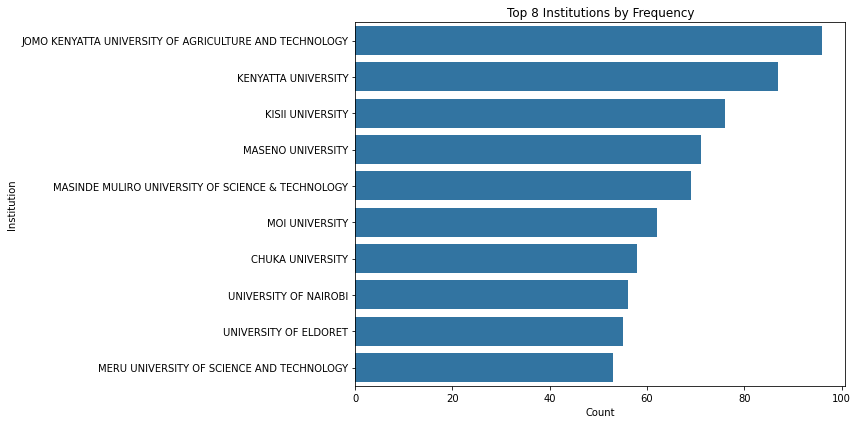

In [43]:
# top 8 institutions by frequency
top_institutions = cutoff_df['institution'].value_counts().iloc[:10]

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_institutions.values, y=top_institutions.index)

plt.xlabel("Count")
plt.ylabel("Institution")
plt.title("Top 8 Institutions by Frequency")
plt.tight_layout()
plt.show()

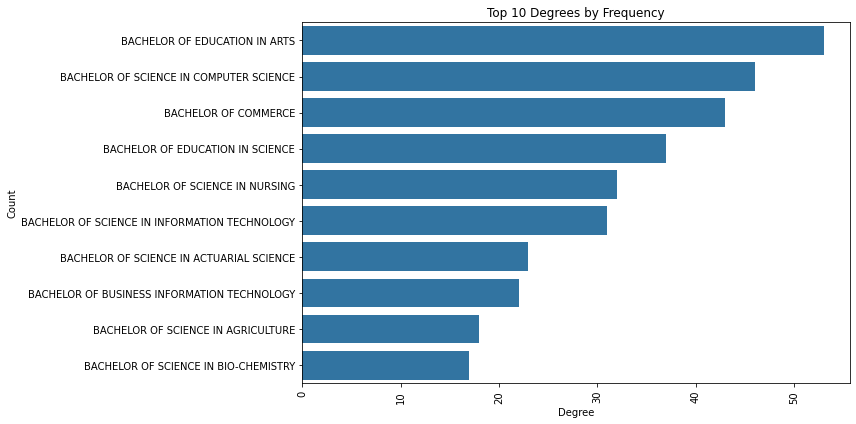

In [44]:
top_degrees= cutoff_df['programme_name'].value_counts().iloc[:10]

plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_degrees.values, y=top_degrees.index)

plt.xticks(rotation=90)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Top 10 Degrees by Frequency")
plt.tight_layout()
plt.show()

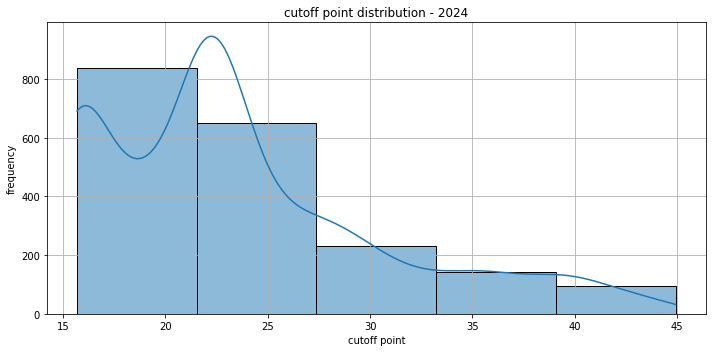

In [45]:
plt.figure(figsize=(10, 5))  
sns.histplot(cutoff_df['cutoff_2024'], bins=5, kde=True)  

plt.title("cutoff point distribution - 2024")
plt.xlabel("cutoff point")
plt.ylabel("frequency")
plt.xticks() 
plt.grid(True)
plt.tight_layout()
plt.show()

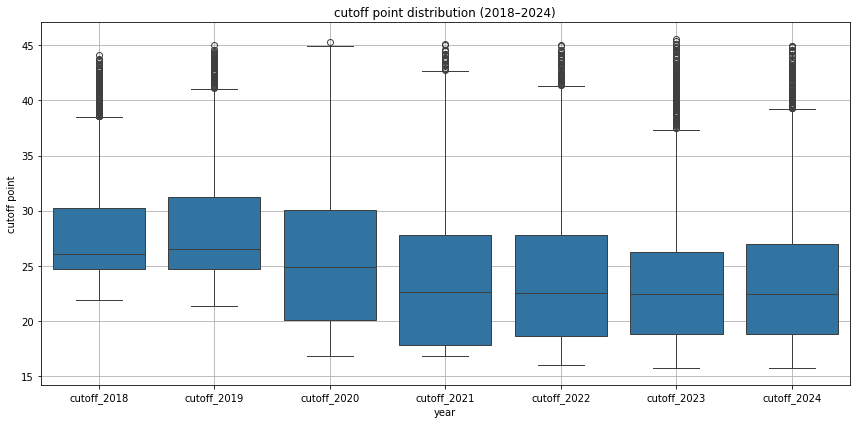

In [46]:
# define year columns
year_cols = ["cutoff_"+str(y) for y in range(2018, 2025)]

# ensure numeric values
cutoff_df[year_cols] = cutoff_df[year_cols].apply(pd.to_numeric, errors='coerce')

# reshape to long format
cutoff_df_melted = cutoff_df.melt(value_vars=year_cols, var_name='Year', value_name='Cutoff')

# plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Cutoff', data=cutoff_df_melted)

plt.title("cutoff point distribution (2018–2024)")
plt.xlabel("year")
plt.ylabel("cutoff point")
plt.grid(True)
plt.tight_layout()
plt.show()

## Bivariate Analysis

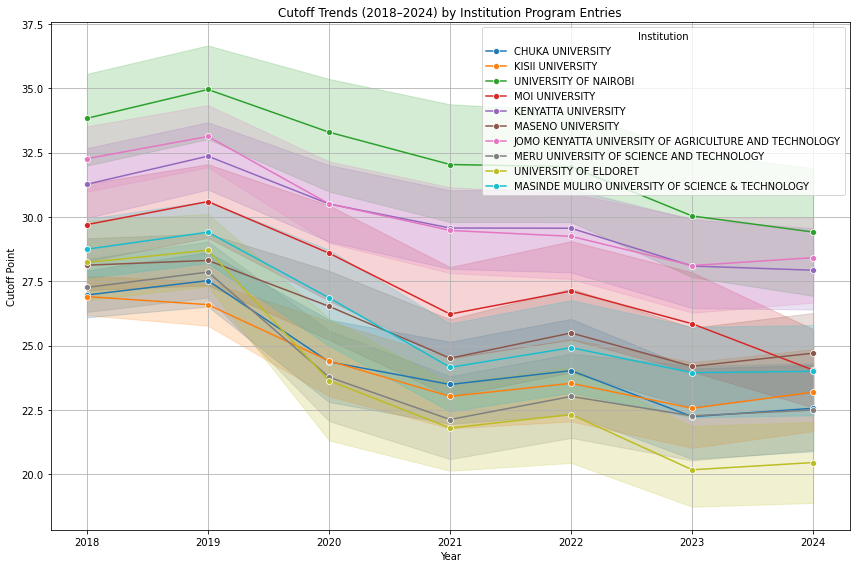

In [47]:
# define year columns first
year_cols = [f"cutoff_{y}" for y in range(2018, 2025)]

# pick top 5 institutions
top_institutions = cutoff_df['institution'].value_counts().nlargest(10).index
df_top = cutoff_df[cutoff_df['institution'].isin(top_institutions)]

# reshape data to long format
df_melted = df_top.melt(
    id_vars='institution',
    value_vars=year_cols,
    var_name='Year',
    value_name='Cutoff'
)

# extract year as integer (remove "cutoff_")
df_melted['Year'] = df_melted['Year'].str.replace("cutoff_", "").astype(int)

# plot line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Year', y='Cutoff', hue='institution', marker='o')

plt.title("Cutoff Trends (2018–2024) by Institution Program Entries")
plt.xlabel("Year")
plt.ylabel("Cutoff Point")
plt.legend(title='Institution')
plt.grid(True)
plt.tight_layout()
plt.show()


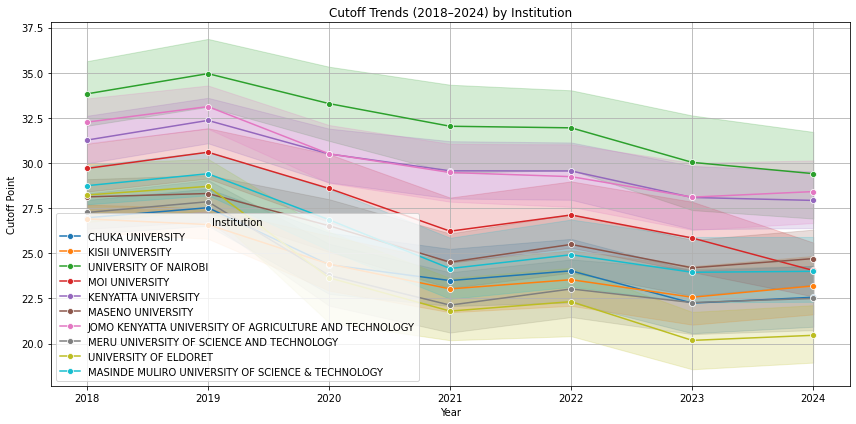

In [48]:
# pick top 5 institutions
top_institutions = cutoff_df['institution'].value_counts().nlargest(10).index
df_top = cutoff_df[cutoff_df['institution'].isin(top_institutions)]

# reshape data to long format
df_melted = df_top.melt(
    id_vars='institution',
    value_vars=year_cols,
    var_name='Year',
    value_name='Cutoff'
)

# clean up Year
df_melted['Year'] = df_melted['Year'].str.replace("cutoff_", "").astype(int)

# plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='Cutoff', hue='institution', marker='o')

plt.title("Cutoff Trends (2018–2024) by Institution")
plt.xlabel("Year")
plt.ylabel("Cutoff Point")
plt.legend(title='Institution', loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

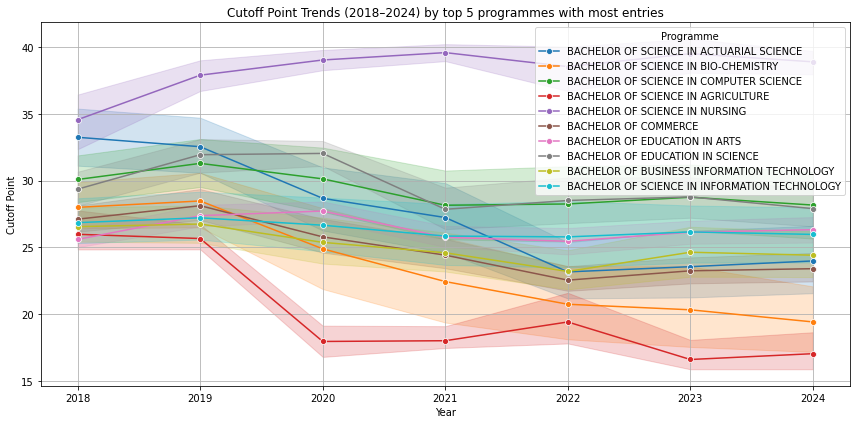

In [49]:
# Select top 5 programmes with most entries
top_programmes = cutoff_df['programme_name'].value_counts().nlargest(10).index
cutoff_df_top = cutoff_df[cutoff_df['programme_name'].isin(top_programmes)]

# Melt the DataFrame to long format
cutoff_df_melted = cutoff_df_top.melt(
    id_vars='programme_name',
    value_vars=year_cols,
    var_name='Year',
    value_name='Cutoff'
)

# Clean up Year column (remove "" and convert to int)
cutoff_df_melted['Year'] = cutoff_df_melted['Year'].str.replace("cutoff_", "").astype(int)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=cutoff_df_melted, x='Year', y='Cutoff', hue='programme_name', marker='o')

plt.title("Cutoff Point Trends (2018–2024) by top 5 programmes with most entries")
plt.xlabel("Year")
plt.ylabel("Cutoff Point")
plt.legend(title="Programme")
plt.grid(True)
plt.tight_layout()
plt.show()


## Multivariate Analysis

# Preprocessing

In [50]:
# features and targe
feature_years = year_cols[:-1]
target_year = year_cols[-1]

# building modeling DataFrame
cutoff_df_model = cutoff_df[feature_years + ['programme_code', target_year]].dropna()

X = cutoff_df_model[feature_years + ['programme_code']]
y = cutoff_df_model[target_year]

# preprocessor: just passthrough (since all features are numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ('features', 'passthrough', feature_years + ['programme_code'])
    ]
)


**Train-test spliting**

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

**RandomForestRegressor**

In [52]:

# pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('features', 'passthrough',
                                                  ['cutoff_2018', 'cutoff_2019',
                                                   'cutoff_2020', 'cutoff_2021',
                                                   'cutoff_2022', 'cutoff_2023',
                                                   'programme_code'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

**XGBRegressor**

In [53]:

xgbmodel = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('xgb', XGBRegressor(n_estimators=200, random_state=42))
])

xgbmodel.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('features', 'passthrough',
                                                  ['cutoff_2018', 'cutoff_2019',
                                                   'cutoff_2020', 'cutoff_2021',
                                                   'cutoff_2022', 'cutoff_2023',
                                                   'programme_code'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stoppi...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

**MLPRegressor**

In [54]:
# Example with 4 hidden layers: 256 → 128 → 64 → 32
mlp = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=500,
                   random_state=42)


mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), max_iter=500,
             random_state=42)

# Evaluation

In [55]:
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.9493672779677758
MSE: 2.4037743273474246
RMSE: 1.5504110188422373


In [56]:
y_pred = xgbmodel.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.9487438844917786
MSE: 2.433369758390697
RMSE: 1.5599262028668845


In [57]:
y_pred = mlp.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: -5.1351941644193415
MSE: 291.26662825548107
RMSE: 17.066535332500298


## Predict 2025 Cutoff

In [59]:
cutoff_df_features = cutoff_df[feature_years + ['programme_code']].copy()
cutoff_df["pred_cutoff_2025"] = model.predict(cutoff_df_features)

In [60]:
## Generate Student

In [61]:
cutoff_df = cutoff_df.copy()

In [62]:
cutoff_df.columns

Index(['programme_code', 'institution', 'programme_name', 'cutoff_2018',
       'cutoff_2019', 'cutoff_2020', 'cutoff_2021', 'cutoff_2022',
       'cutoff_2023', 'cutoff_2024', 'programme_name_code',
       'abbr_programme_name', 'pred_cutoff_2025'],
      dtype='object')

In [63]:
degree_req_df.columns

Index(['Unnamed: 0', 'programme_name', 'cluster', 'subcluster', 'subject_1',
       'subject_1_grade', 'subject_2', 'subject_2_grade', 'subject_3',
       'subject_3_grade', 'subject_4', 'subject_4_grade'],
      dtype='object')

In [64]:
degree_req_cutoff_df = degree_req_df[['programme_name', 'cluster', 'subcluster', 'subject_1','subject_2', 'subject_3',"subject_4"]].merge(cutoff_df[['programme_name','programme_code','institution', 'pred_cutoff_2025']], how='left')

In [65]:
# Step 1: Merge with cutoff_df
degree_req_cutoff_df = degree_req_df[
    ['programme_name', 'cluster', 'subcluster',
     'subject_1', 'subject_1_grade',
     'subject_2', 'subject_2_grade',
     'subject_3', 'subject_3_grade',
     'subject_4', 'subject_4_grade']
].merge(
    cutoff_df[['programme_name', 'programme_code', 'institution', 'pred_cutoff_2025']],
    on='programme_name',
    how='left'
)

# Step 2: Get unique subcluster + subjects + grades
unique_subclusters = degree_req_cutoff_df.drop_duplicates(
    subset=['subcluster', 'subject_1', 'subject_1_grade',
            'subject_2', 'subject_2_grade',
            'subject_3', 'subject_3_grade',
            'subject_4', 'subject_4_grade']
)[[
    'subcluster',
    'subject_1', 'subject_1_grade',
    'subject_2', 'subject_2_grade',
    'subject_3', 'subject_3_grade',
    'subject_4', 'subject_4_grade'
]]
degree_req_cutoff_df.head()

,programme_name,cluster,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade,programme_code,institution,pred_cutoff_2025
0,BACHELOR OF SCIENCE IN INFORMATION SCIENCE,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null,1073150,RONGO UNIVERSITY,21.323915
1,BACHELOR OF SCIENCE IN INFORMATION SCIENCE,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null,1105233,CHUKA UNIVERSITY,21.375000
2,BACHELOR OF SCIENCE IN INFORMATION SCIENCE,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null,1077150,KENYA METHODIST UNIVERSITY,21.375000
3,BACHELOR OF SCIENCE IN INFORMATION SCIENCE,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null,1063150,TECHNICAL UNIVERSITY OF MOMBASA,21.375000
4,BACHELOR OF SCIENCE IN INFORMATION SCIENCE,2,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null,1096150,GARISSA UNIVERSITY,21.375000


In [66]:
degree_req_cutoff_df.to_csv("degree_req_cutoff.csv", index=False)

In [67]:
degree_req_cutoff_df.columns

Index(['programme_name', 'cluster', 'subcluster', 'subject_1',
       'subject_1_grade', 'subject_2', 'subject_2_grade', 'subject_3',
       'subject_3_grade', 'subject_4', 'subject_4_grade', 'programme_code',
       'institution', 'pred_cutoff_2025'],
      dtype='object')

In [68]:
unique_subclusters

,subcluster,subject_1,subject_1_grade,subject_2,subject_2_grade,subject_3,subject_3_grade,subject_4,subject_4_grade
0,2A,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B,C+,Any_GROUP_II / any_GROUP_III,Null,A_GROUP_II / a_GROUP_III / any_GROUP_IV /,Null
36,2B,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
61,3A,ENG/KIS,C+,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
76,3D,ENG/KIS,Null,MAT_ALTERNATIVE_A/MAT_ALTERNATIVE_B / any_GROU...,Null,Any_GROUP_III,Null,A_GROUP_II / 2nd_GROUP_III / any_GROUP_IV / an...,Null
141,4A,MAT_ALTERNATIVE_A,C,PHY,C,BIO/CHE/GEO,Null,A_GROUP_II / any_GROUP_III / any_GROUP_IV / an...,Null
144,4B,MAT_ALTERNATIVE_A,C,PHY,C,CHE,C,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
145,5A,MAT_ALTERNATIVE_A,C+,PHY,C+,CHE,C+,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
189,5B,MAT_ALTERNATIVE_A,C+,PHY,C+,CHE,C+,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
210,5C,MAT_ALTERNATIVE_A,C,PHY,C,CHE,C,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
214,5D,MAT_ALTERNATIVE_A,C+,PHY,C+,CHE,C+,BIO / any_GROUP_III / any_GROUP_IV / any_GROUP_V,Null
